In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
import scipy.stats as stats
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

In [57]:
dados = pd.read_csv('credit_risk_dataset.csv')

#head exibe os primeiros 10 registros
dados.head(10)

#tail exibe os últimos registros
#dados.tail(10)

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   
5          21           9900                   OWN                2.0   
6          26          77100                  RENT                8.0   
7          24          78956                  RENT                5.0   
8          24          83000                  RENT                8.0   
9          21          10000                   OWN                6.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   
5     VENTURE          A       2500           7.14            1   
6   EDUCATION          B      35000          12.42            1   
7     MEDICAL          B      35000          11.11            1   
8    PERSONAL          A      35000           8.90            1   
9     VENTURE          D       1600          14.74            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4  
5                 0.25                         N                           2  
6                 0.45                         N                           3  
7                 0.44                         N                           4  
8                 0.42                         N                           2  
9                 0.16                         N                           3

**Feature Name**        **Description**
 / person_age                   Age
 / person_income	            Annual Income
 / personhomeownership	        Home ownership
 / personemplength	            Employment length (in years)
 / loan_intent	                Loan intent
 / loan_grade	                Loan grade
 / loan_amnt	                Loan amount
 / loan_int_rate                Interest rate
 / loan_status	                Loan status (0 is non default 1 is default)
 / loanpercentincome	        Percent income
 / cb_person_default_on_file    Historical default
 / cb_preson_cred_hist_length   Credit history length

In [14]:
#Mostra um resumo de como os dados estão distribuídos
dados.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [15]:
#lista pessoas com renda pessoal acima de 23000
dados[dados['person_income'] >= 23000]


person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
6              26          77100                  RENT                8.0   
7              24          78956                  RENT                5.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
6            EDUCATION          B      35000          12.42            1   
7              MEDICAL          B      35000          11.11            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
3                     0.53                         N   
4                     0.55                         Y   
6                     0.45                         N   
7                     0.44                         N   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
3                               2  
4                               4  
6                               3  
7                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[30942 rows x 12 columns]

In [16]:
#lista pessoas com loan_int_rate (Interest rate) 
dados[dados['loan_int_rate'] <= 18]

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[29039 rows x 12 columns]

In [39]:
#loan_status (Loan status)
# 0 is non default 
# 1 is default)
np.unique(dados['loan_status'], return_counts=True)

(array([0, 1], dtype=int64), array([25473,  7108], dtype=int64))

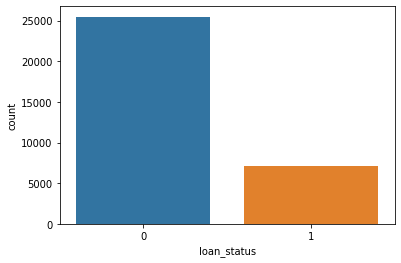

In [40]:
sns.countplot(x = dados['loan_status']);

In [ ]:
#distribuição dos dados numéricos
numerical = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
dados[numerical].hist(figsize=(15,15))

In [26]:
def descriptive_summary_n(data, column):
    fig, axs = plt.subplots(1,2, figsize=(19,6))
    #creating histogram plot
    axs[0].hist(data[column]) 

    #vertical line for mean of the distribution
    axs[0].axvline(
        data[column].mean(), 
        color='red', 
        label=f"Mean: {round(data[column].mean(),2)}") 

    #vertical line for median of the distribution
    axs[0].axvline(
        data[column].median(), 
        color='green', 
        label=f"Median: {round(data[column].median(),2)}") 

    #vertical line for 25th percentile of the distribution
    axs[0].axvline(
        x=data[column].describe()[4],
        color='r', linestyle='--', 
        label=f"25th percentile: {data[column].describe()[4]}") 

    #vertical line for 75th percentile of the distribution
    axs[0].axvline(
        x=data[column].describe()[6],
        color='r', linestyle='--', 
        label=f"75th percentile: {data[column].describe()[6]}")
        
    axs[0].legend()
    
    #creating boxplot
    sns.boxplot(data=data, x=column, ax=axs[1]) 
    #vertical line for the mean of the distribution
    axs[1].axvline(data[column].mean(), color='red') 

    fig.suptitle(f"Histogram and Boxplot of {column}")
    plt.show()
    
    #describe do campo
    print(f"{data[column].describe().round(3)}\n")

    print(f"Range: {data[column].max() - data[column].min()}")
    print(f"Interquartile Range: {data[column].describe()[6] - data[column].describe()[4]}\n")
    print(f"Skewness: {skew(data[data[column].isna()==False][column], bias=True)}")
    print(f"Kurtosis: {kurtosis(data[data[column].isna()==False][column], bias=True)}")

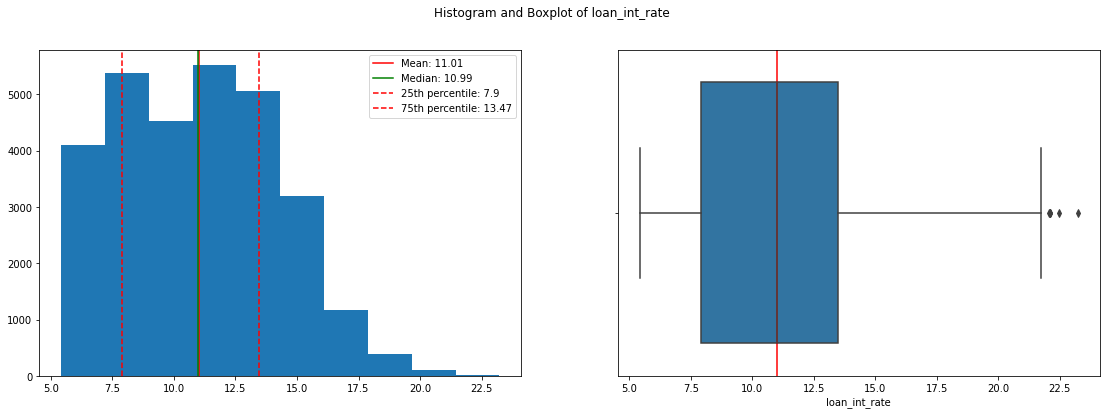

count    29465.000
mean        11.012
std          3.240
min          5.420
25%          7.900
50%         10.990
75%         13.470
max         23.220
Name: loan_int_rate, dtype: float64

Range: 17.799999999999997
Interquartile Range: 5.57

Skewness: 0.2085396846918691
Kurtosis: -0.6716987706450692


In [27]:
descriptive_summary_n(dados, 'loan_int_rate')

In [67]:
gf = px.histogram(x = dados['person_income'])
gf.show()


In [78]:
#gráfico de dispersão (scater) nos mostra que temos valores que fogem do padrão, como idades acima de 100 anos
grafico = px.scatter_matrix(dados, dimensions=['person_age', 'person_income', 'loan_amnt'])
grafico.show()

In [77]:
#para tratar estes valores possivelmente inválidos temos duas opções

#deixar na tabela apenas registros com idade menor ou igual 95
dados2 = dados[dados['person_age'] <= 95]
dados

#apagar a coluna dado que ela pode não ser relevante
#ao informar axis = 1 indicamos que queremos remover a coluna person_age.
#dados2 = dados.drop('person_age', axis = 1)
#ou
#dados2 = dados.drop([dados['person_age'] > 95].index)

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]

In [ ]:
#gráfico de dispersão (scater) nos mostra que temos valores que fogem do padrão, como idades acima de 100 anos
grafico = px.scatter_matrix(dados, dimensions=['person_age', 'person_income', 'loan_amnt'])
grafico.show()

In [91]:
#aplicando 3a visão para tratamento de idade fora do padrão
#para registros com idade fora do padrão colocamos a idade média
dados3 = dados
media_idade = dados3['person_age'][dados3['person_age'] < 95].mean()

dados3.loc[dados3['person_age'] >= 95, 'person_age'] = media_idade
dados2 = dados3[dados3['person_age'] <= 95]
dados2

person_age  person_income person_home_ownership  person_emp_length  \
0            22.0          59000                  RENT              123.0   
1            21.0           9600                   OWN                5.0   
2            25.0           9600              MORTGAGE                1.0   
3            23.0          65500                  RENT                4.0   
4            24.0          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576        57.0          53000              MORTGAGE                1.0   
32577        54.0         120000              MORTGAGE                4.0   
32578        65.0          76000                  RENT                3.0   
32579        56.0         150000              MORTGAGE                5.0   
32580        66.0          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]